In [1]:
import torch

# Torch
- torch is a library for processing tensors
- Tensor can be a numpy array/ a vector / a number / n- dimensional array

In [2]:
t1 = torch.tensor(4.)
print("t1 = ",t1)
print("Type",t1.dtype)

t1 =  tensor(4.)
Type torch.float32


In [38]:
# more complex tensor
t2 = torch.tensor([1., 2, 3, 4])
print("t2 = ",t2)
print("Type",t2.dtype)

t3 = torch.tensor([[1., 3],
[1., 3],
[1., 3],])
print("\nt3 = ",t3)
print("Type",t3.dtype)

x = torch.tensor(3., requires_grad = True)
w = torch.tensor(4., requires_grad = True)
b = torch.tensor(5., requires_grad = True)
print(f"x = {x}\nw = {w}\nb = {b}")
print(f"x_type = {x.dtype}\nw_type = {w.dtype}\nb_type = {b.dtype}")
y = w+x+b
print(f"\nadding tensors\nw+x+b = {w+x+b}")
print(f"\ncompute derivatives\ny.backward = {y.backward()}\n Note: Only tensors with requires_grad can be calculated for derivatives")


t2 =  tensor([1., 2., 3., 4.])
Type torch.float32

t3 =  tensor([[1., 3.],
        [1., 3.],
        [1., 3.]])
Type torch.float32
x = 3.0
w = 4.0
b = 5.0
x_type = torch.float32
w_type = torch.float32
b_type = torch.float32

adding tensors
w+x+b = 12.0

compute derivatives
y.backward = None
 Note: Only tensors with requires_grad can be calculated for derivatives


In [39]:
#print(f"\nshape of tensors [y.size()]{y.size()}")
#print(f"You can reshape tensors with [y.reshape(3,2,2)]{y.reshape(3,3,3)}")
t6 = torch.full((3,2),42)
print(f"create tensor with fixed value for every element: \ntorch.full((rows=3,col=2),value) = \n{torch.full((3,2),42)}")
print(f"concatenate two tensors with compatible shapes: \ntorch.cat((tensor_1 = t3, tensor_2= t6)) = \n{torch.cat((t3,t6))}")


create tensor with fixed value for every element: 
torch.full((rows=3,col=2),value) = 
tensor([[42, 42],
        [42, 42],
        [42, 42]])
concatenate two tensors with compatible shapes: 
torch.cat((tensor_1 = t3, tensor_2= t6)) = 
tensor([[ 1.,  3.],
        [ 1.,  3.],
        [ 1.,  3.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load breast cancer dataset
data = load_breast_cancer()
x, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define your logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_features, 1)  # Linear transformation
 
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

# Assuming n_features is the number of features in your input data
n_features = x_train.shape[1]

# Create the logistic regression model
model = LogisticRegression(n_features)

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass and loss calculation
    y_predicted = model(x_train_tensor)
    loss = criterion(y_predicted.squeeze(), y_train_tensor)
 
    # Backward pass and optimization
    optimizer.zero_grad()  # Reset gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Optimizer step
 
    if (epoch + 1) % 10 == 0:  # Print every 10 epochs
        print(f"Epoch: {epoch + 1}, Loss: {loss.item():.4f}")

# Convert tensor predictions to numpy array
with torch.no_grad():
    y_predicted_tensor = model(x_test_tensor)
    y_predicted_class = y_predicted_tensor.round().squeeze().int()  # Remove singleton dimension, round, and convert to int
    y_test_int = y_test_tensor.int()  # Ensure y_test is of type int to match y_predicted_class
    accuracy = (y_predicted_class == y_test_int).sum().item() / len(y_test_int)  # Calculate accuracy
    print("Accuracy:", accuracy)


Epoch: 10, Loss: 0.7106
Epoch: 20, Loss: 0.5592
Epoch: 30, Loss: 0.4708
Epoch: 40, Loss: 0.4132
Epoch: 50, Loss: 0.3723
Epoch: 60, Loss: 0.3416
Epoch: 70, Loss: 0.3175
Epoch: 80, Loss: 0.2980
Epoch: 90, Loss: 0.2819
Epoch: 100, Loss: 0.2682
Accuracy: 0.9649122807017544


In [30]:
import pandas as pd
df = pd.read_csv("C:\\Users\\alok\\Desktop\\Inzint\\datasets\\wine_data.csv", skiprows=1)

In [31]:
df.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0


In [39]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class DiabetesClass(Dataset):
    def __init__(self, data_path):
        # Load data from the specified path
        data = np.loadtxt(data_path, dtype=torch.float32, skiprows=1)
        self.x = torch.from_numpy(data[:, :-1])  # Features
        self.y = torch.from_numpy(data[:, -1])   # Labels
        self.n_samples = data.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples



In [40]:
# Example usage:
# Specify the path to your dataset
data_path = df

# Create an instance of the DiabetesClass dataset
diabetes_dataset = DiabetesClass(data_path)

# Create a DataLoader for the dataset
data_loader = DataLoader(diabetes_dataset, batch_size=64, shuffle=True)

# Iterate over batches of data in the DataLoader
for inputs, targets in data_loader:
    # Training or evaluation code here
    pass


TypeError: Cannot interpret 'torch.float32' as a data type

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
excel_file_path = 'C:\\Users\\alok\\Desktop\\Inzint\\datasets\\diabetes.xlsx'

# Save the DataFrame as an Excel file
df.to_excel(excel_file_path, index=False)

In [34]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()

# Extract features (X) and labels (y)
X = wine_data.data
y = wine_data.target


In [35]:
import torch
from torch.utils.data import Dataset

class WineDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        self.n_samples = X.shape[0]

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [36]:
from torch.utils.data import DataLoader

# Create a WineDataset instance
wine_dataset = WineDataset(X, y)

# Create a DataLoader for the dataset
batch_size = 64
wine_dataloader = DataLoader(wine_dataset, batch_size=batch_size, shuffle=True)


In [2]:
pip list

Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.3.0
aiobotocore                              2.9.0
aiohttp                                  3.8.5
aiohttp-retry                            2.8.3
aioitertools                             0.11.0
aiosignal                                1.3.1
altair                                   4.2.2
altgraph                                 0.17.4
antigravity                              0.1
antlr4-python3-runtime                   4.9.3
anyio                                    3.7.1
apyori                                   1.1.2
argon2-cffi                              21.3.0
argon2-cffi-bindings                     21.2.0
array-record                             0.2.0
arrow                                    1.2.3
asgiref                                  3.7.2
asttokens                                2.0.7
astunparse                               

In [4]:
import torch

In [5]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


100%|██████████| 9912422/9912422 [00:06<00:00, 1446095.65it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 178836.88it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:02<00:00, 560645.14it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4547750.96it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



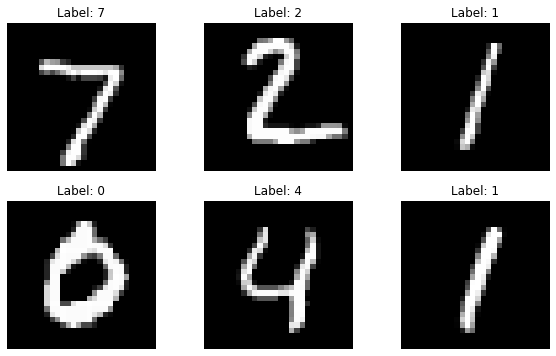

In [8]:
import torch
import torchvision
import torchvision.transforms as ts
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train = torchvision.datasets.MNIST(root="./data", train=True,
                                   transform=ts.ToTensor(),
                                   download=True)
test = torchvision.datasets.MNIST(root="./data", train=False,
                                  transform=ts.ToTensor(),
                                  download=True)

# dataLoaders
train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

# Get a batch of test samples
test_samples = iter(test_loader)
sample_data, sample_target = next(test_samples)

# plotting
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(sample_data[i][0], cmap='gray')  # Displaying the image
    plt.title(f"Label: {sample_target[i].item()}")
    plt.axis('off')

plt.show()


In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Applying ReLU activation function to the hidden layer
        x = self.fc2(x)  # Output layer
        return x


# Initialize model
model = SimpleNN(input_size=784, hidden_size=500, num_classes=10)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer_2 = optim.SGD(model.parameters(), lr=0.001)
optimizer_1 = optim.Adam(model.parameters(), lr=0.001)


In [11]:
# Set model to training mode
model.train()

# Define number of epochs
num_epochs = 5

# Training loop_1
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the gradients
        optimizer_1.zero_grad()
        
        # Forward pass
        outputs = model(inputs.view(inputs.size(0), -1))  # Reshape inputs for the fully connected layer
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer_1.step()
        
        # Print statistics
        running_loss += loss.item()
        if (i+1) % 100 == 0:  # Print every 100 mini-batches
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

print('Training Finished')
# Training loop_2
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the gradients
        optimizer_2.zero_grad()
        
        # Forward pass
        outputs = model(inputs.view(inputs.size(0), -1))  # Reshape inputs for the fully connected layer
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer_2.step()
        
        # Print statistics
        running_loss += loss.item()
        if (i+1) % 100 == 0:  # Print every 100 mini-batches
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

print('Training_2 Finished')


Epoch [1/5], Step [100/600], Loss: 0.6632
Epoch [1/5], Step [200/600], Loss: 0.3089
Epoch [1/5], Step [300/600], Loss: 0.2550
Epoch [1/5], Step [400/600], Loss: 0.2036
Epoch [1/5], Step [500/600], Loss: 0.1947
Epoch [1/5], Step [600/600], Loss: 0.1579
Epoch [2/5], Step [100/600], Loss: 0.1404
Epoch [2/5], Step [200/600], Loss: 0.1305
Epoch [2/5], Step [300/600], Loss: 0.1222
Epoch [2/5], Step [400/600], Loss: 0.1003
Epoch [2/5], Step [500/600], Loss: 0.1115
Epoch [2/5], Step [600/600], Loss: 0.1036
Epoch [3/5], Step [100/600], Loss: 0.0779
Epoch [3/5], Step [200/600], Loss: 0.0769
Epoch [3/5], Step [300/600], Loss: 0.0783
Epoch [3/5], Step [400/600], Loss: 0.0766
Epoch [3/5], Step [500/600], Loss: 0.0777
Epoch [3/5], Step [600/600], Loss: 0.0731
Epoch [4/5], Step [100/600], Loss: 0.0555
Epoch [4/5], Step [200/600], Loss: 0.0569
Epoch [4/5], Step [300/600], Loss: 0.0533
Epoch [4/5], Step [400/600], Loss: 0.0622
Epoch [4/5], Step [500/600], Loss: 0.0480
Epoch [4/5], Step [600/600], Loss:

Precision: 0.9809
Recall: 0.9809
F1-score: 0.9809


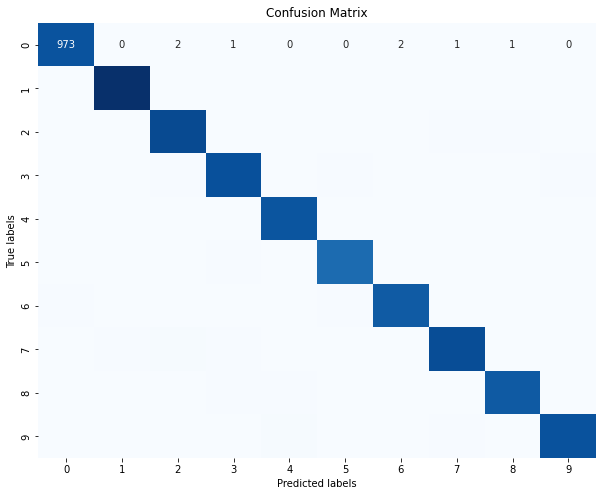

In [14]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
# Set model to evaluation mode
model.eval()

# Initialize variables for evaluation
all_labels = []
all_predicted = []

# Disable gradient computation to save memory and computations
with torch.no_grad():
    for inputs, labels in test_loader:
        # Forward pass
        outputs = model(inputs.view(inputs.size(0), -1))  # Reshape inputs for the fully connected layer
        
        # Predictions
        _, predicted = torch.max(outputs, 1)
        
        # Accumulate true labels and predicted labels
        all_labels.extend(labels.tolist())
        all_predicted.extend(predicted.tolist())

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predicted = np.array(all_predicted)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true=all_labels, y_pred=all_predicted, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_true=all_labels, y_pred=all_predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


['ants', 'bees']


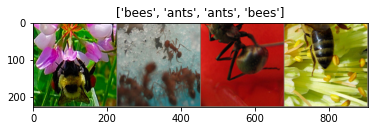

In [1]:
import zipfile
from torchvision import datasets, transforms
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Unzip the file
zip_file_path = "C:\\Users\\alok\\Downloads\\sent_now.zip"
extract_to_dir = 'C:\\Users\\alok\\Downloads\\sent_now_1'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load image data
data_dir = "C:\\Users\\alok\\Downloads\\sent_now\\hymenoptera_data"  # Update this path if necessary
image_data = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=data_transforms[x])
              for x in ["train", "val"]}

# DataLoader
image_loader = {x: torch.utils.data.DataLoader(image_data[x], batch_size=4, shuffle=True)
                for x in ["train", "val"]}

# Class names
class_names = image_data["train"].classes

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(class_names)

# Display images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(image_loader["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])
plt.show()


In [4]:
import time
import copy

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    model = model.to(device)
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in image_loader[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(image_data[phase])
            epoch_acc = running_corrects.double() / len(image_data[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [ ]:
model.to(device)
inputs = inputs.to(device)
labels = labels.to(device)



In [6]:
import torch
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
from torch.optim import lr_scheduler

# Step 1: Define the Model
model = models.resnet18(pretrained=True)  # Example: ResNet18 pre-trained on ImageNet

# num_features = model.fc.in_features
# model.fc = nn.Linear(num_ftrs,2)

# Step 2: Set Up Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Step 3: Set Up Learning Rate Scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Step 4: Call the train_model Function
model = train_model(model, criterion, optimizer, scheduler, num_epochs=25)


# Step 6: Save the Model
torch.save(model.state_dict(), 'trained_model.h5')


c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------
train Loss: 1.7231 Acc: 0.6230
val Loss: 0.5500 Acc: 0.7843

Epoch 1/24
----------
train Loss: 0.7343 Acc: 0.7049
val Loss: 1.1748 Acc: 0.7190

Epoch 2/24
----------
train Loss: 0.6107 Acc: 0.7746
val Loss: 0.3916 Acc: 0.8497

Epoch 3/24
----------
train Loss: 0.5717 Acc: 0.7541
val Loss: 0.4977 Acc: 0.7582

Epoch 4/24
----------
train Loss: 0.5796 Acc: 0.7582
val Loss: 0.5795 Acc: 0.7778

Epoch 5/24
----------
train Loss: 0.5576 Acc: 0.8156
val Loss: 0.4656 Acc: 0.8105

Epoch 6/24
----------
train Loss: 0.5918 Acc: 0.8156
val Loss: 0.3853 Acc: 0.8235

Epoch 7/24
----------
train Loss: 0.3901 Acc: 0.8115
val Loss: 0.3255 Acc: 0.8758

Epoch 8/24
----------
train Loss: 0.3235 Acc: 0.8525
val Loss: 0.3033 Acc: 0.8627

Epoch 9/24
----------
train Loss: 0.2892 Acc: 0.8648
val Loss: 0.2654 Acc: 0.8954

Epoch 10/24
----------
train Loss: 0.3831 Acc: 0.8361
val Loss: 0.2831 Acc: 0.8758

Epoch 11/24
----------
train Loss: 0.3268 Acc: 0.8484
val Loss: 0.2475 Acc: 0.8889

Ep